In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./data/processedData/merged_data.csv')
data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month)  Population  Users  
0               10813      814885  24701  
1                9237      814885  24701  
2               11242      814885  24701  
3               23327      814885  24701  
4                8536      814885  24701

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 38.4+ MB


In [25]:
data.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25%      2705.000000      25.000000         8424.000000  6.712380e+05   
50%      7459.000000      33.000000        14685.000000  1.595037e+06   
75%     36078.000000      42.000000        21035.000000  8.405837e+06   
max     60000.000000      65.000000        35000.000000  8.405837e+06   

               Users  
count  359392.000000  
mean   158365.582267  
std    100850.051020  
min      3643.000000  
25%     80021.000000  
50%    144132.000000  
75%    302149.000000  
max    302149.000000

In [27]:
data.corr(numeric_only=True)

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    Customer ID       Age  Income (USD/Month)  Population  \
Transaction ID        -0.016912 -0.001267           -0.001570    0.023868   
KM Travelled           0.000389 -0.000369           -0.000544   -0.002311   
Price Charged         -0.177324 -0.003084            0.003228    0.326589   
Cost of Trip           0.003077 -0.000189           -0.000633    0.015108   
Customer ID            1.000000 -0.004735           -0.013608   -0.647052   
Age                   -0.004735  1.000000            0.003907   -0.009002   
Income (USD/Month)    -0.013608  0.003907            1.000000    0.011868   
Population            -0.647052 -0.009002            0.011868    1.000000   
Users                 -0.610742 -0.005906            0.010464    0.915490   

                       Users  
Transaction ID      0.013526  
KM Travelled       -0.000428  
Price Charged       0.281061  
Cost of Trip        0.023628  
Customer ID        -0.610742  
Age                -0.005906  
Income (USD/Month)  0.010464  
Population          0.915490  
Users               1.000000

In [28]:
data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### How many people use which of the company's cabs

In [3]:
pd.crosstab(data['Company'], columns='count', normalize=True)

col_0          count
Company             
Pink Cab    0.235706
Yellow Cab  0.764294

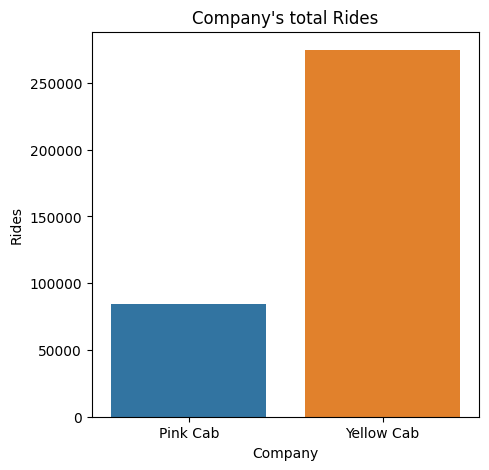

In [4]:
plt.figure(figsize=(5, 5))
sns.countplot(x=data['Company'], data=data)
plt.title("Company's total Rides")
plt.xlabel("Company")
plt.ylabel("Rides")
plt.show()

In [5]:
pd.crosstab(data['City'], columns='count', normalize=True)

col_0              count
City                    
ATLANTA GA      0.021027
AUSTIN TX       0.013623
BOSTON MA       0.082617
CHICAGO IL      0.157558
DALLAS TX       0.019525
DENVER CO       0.010643
LOS ANGELES CA  0.133651
MIAMI FL        0.017958
NASHVILLE TN    0.008375
NEW YORK NY     0.277928
ORANGE COUNTY   0.011080
PHOENIX AZ      0.005743
PITTSBURGH PA   0.003653
SACRAMENTO CA   0.006586
SAN DIEGO CA    0.057007
SEATTLE WA      0.022251
SILICON VALLEY  0.023704
TUCSON AZ       0.005373
WASHINGTON DC   0.121697

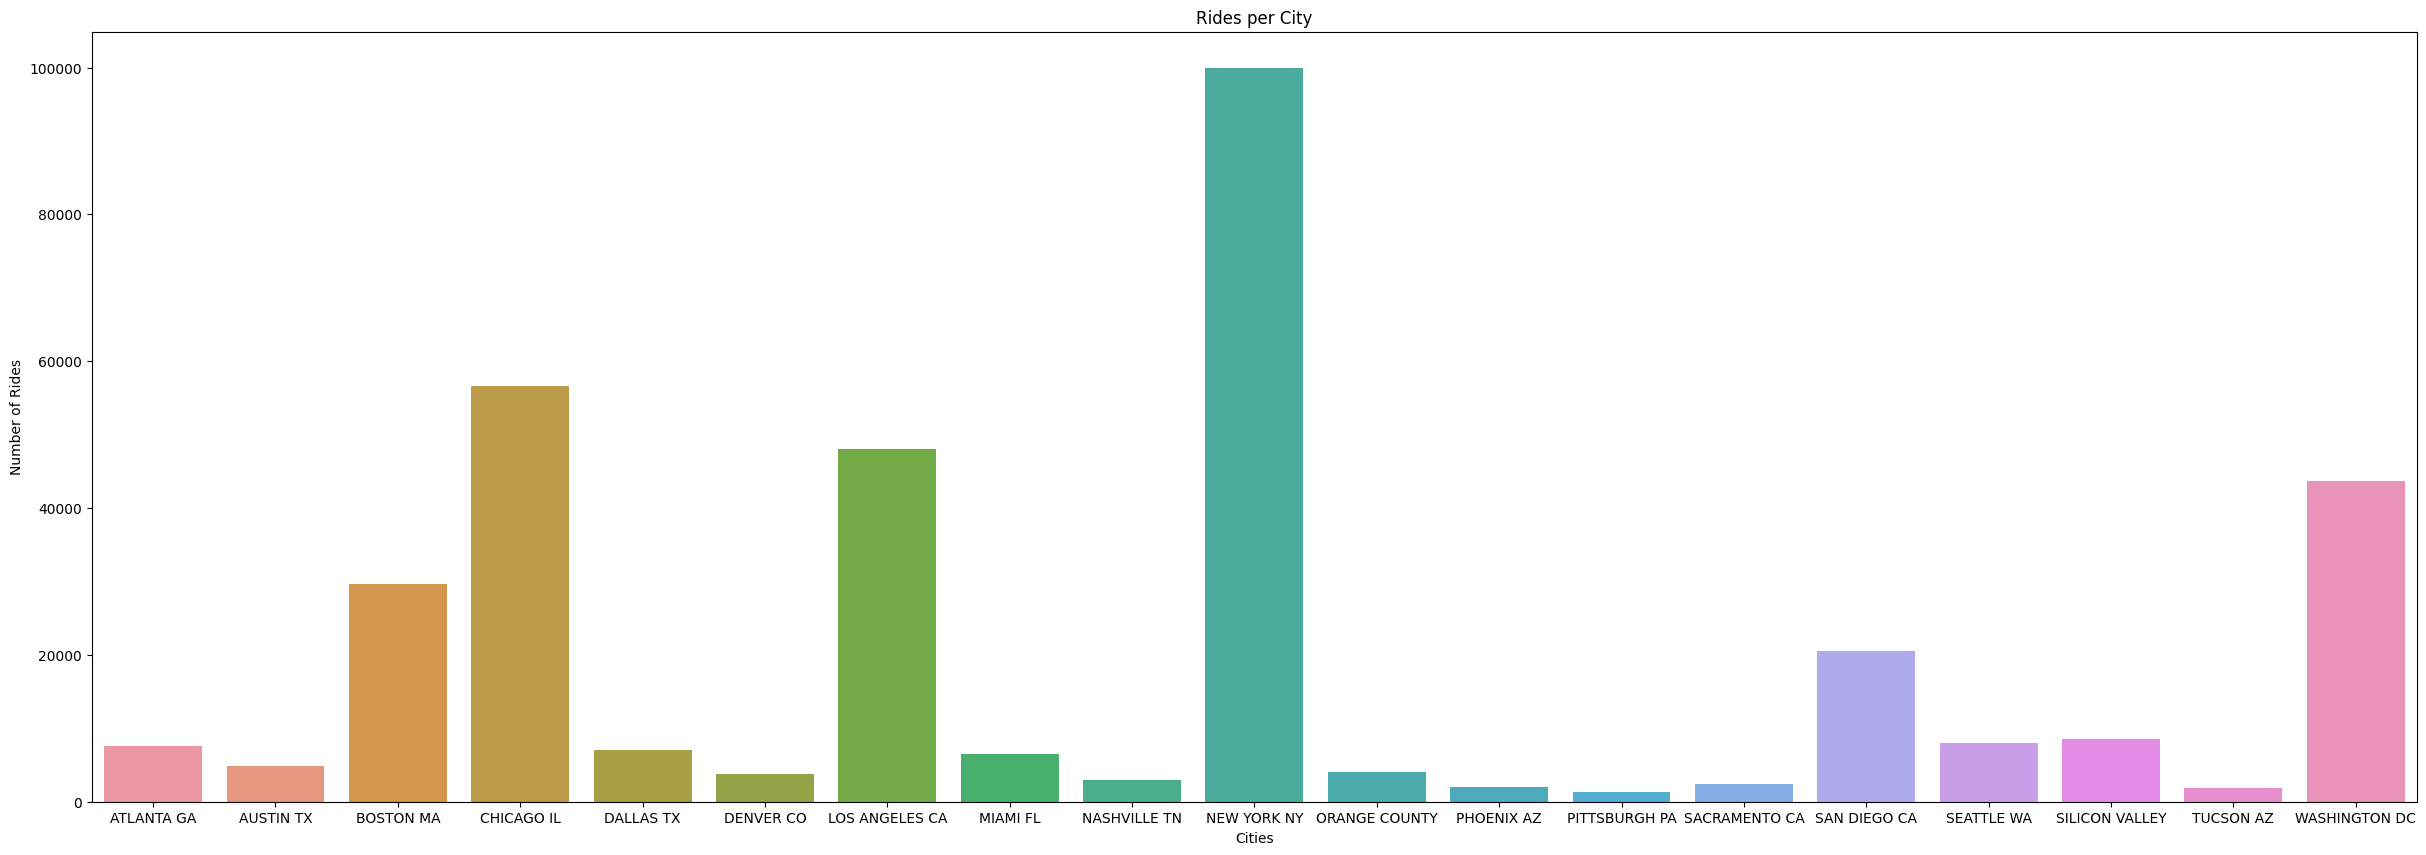

In [6]:
plt.figure(figsize=(30, 10))
sns.countplot(x=data['City'], data=data)
plt.title("Rides per City")
plt.xlabel("Cities")
plt.ylabel("Number of Rides")
plt.show()

### Avg. KM travelled in each city

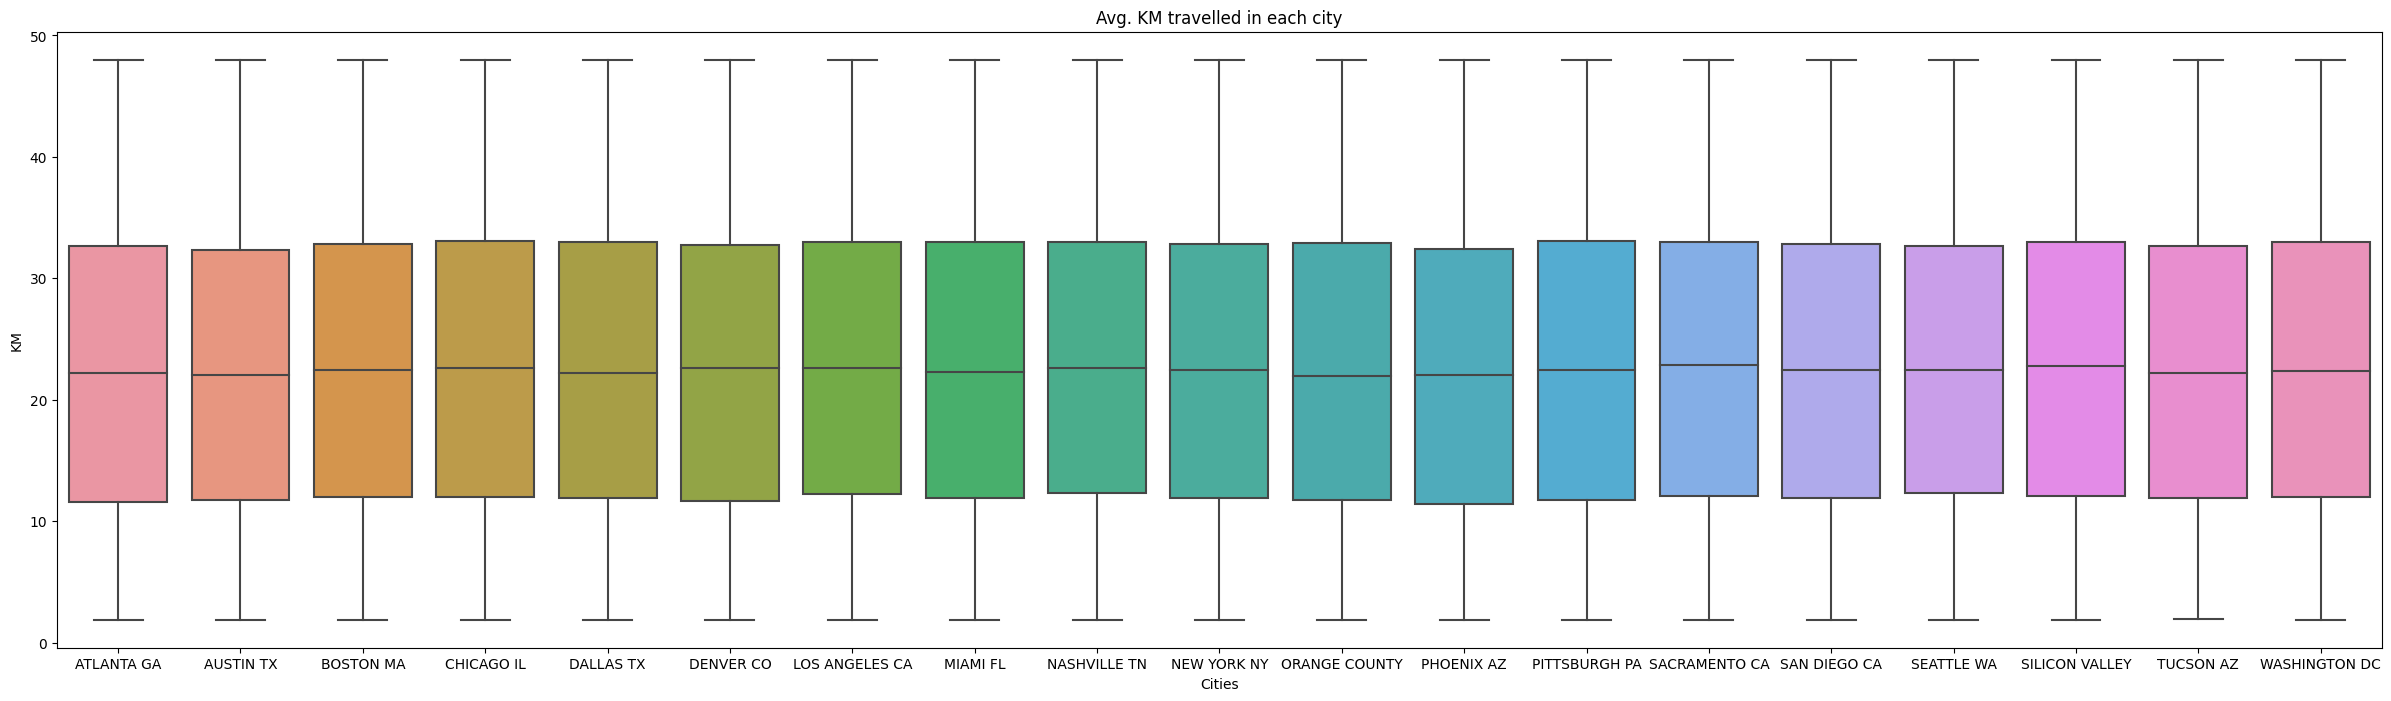

In [7]:
plt.figure(figsize=(30, 8))
sns.boxplot(data=data, y=data['KM Travelled'], x=data['City'])
plt.title("Avg. KM travelled in each city")
plt.xlabel("Cities")
plt.ylabel("KM")
plt.show()

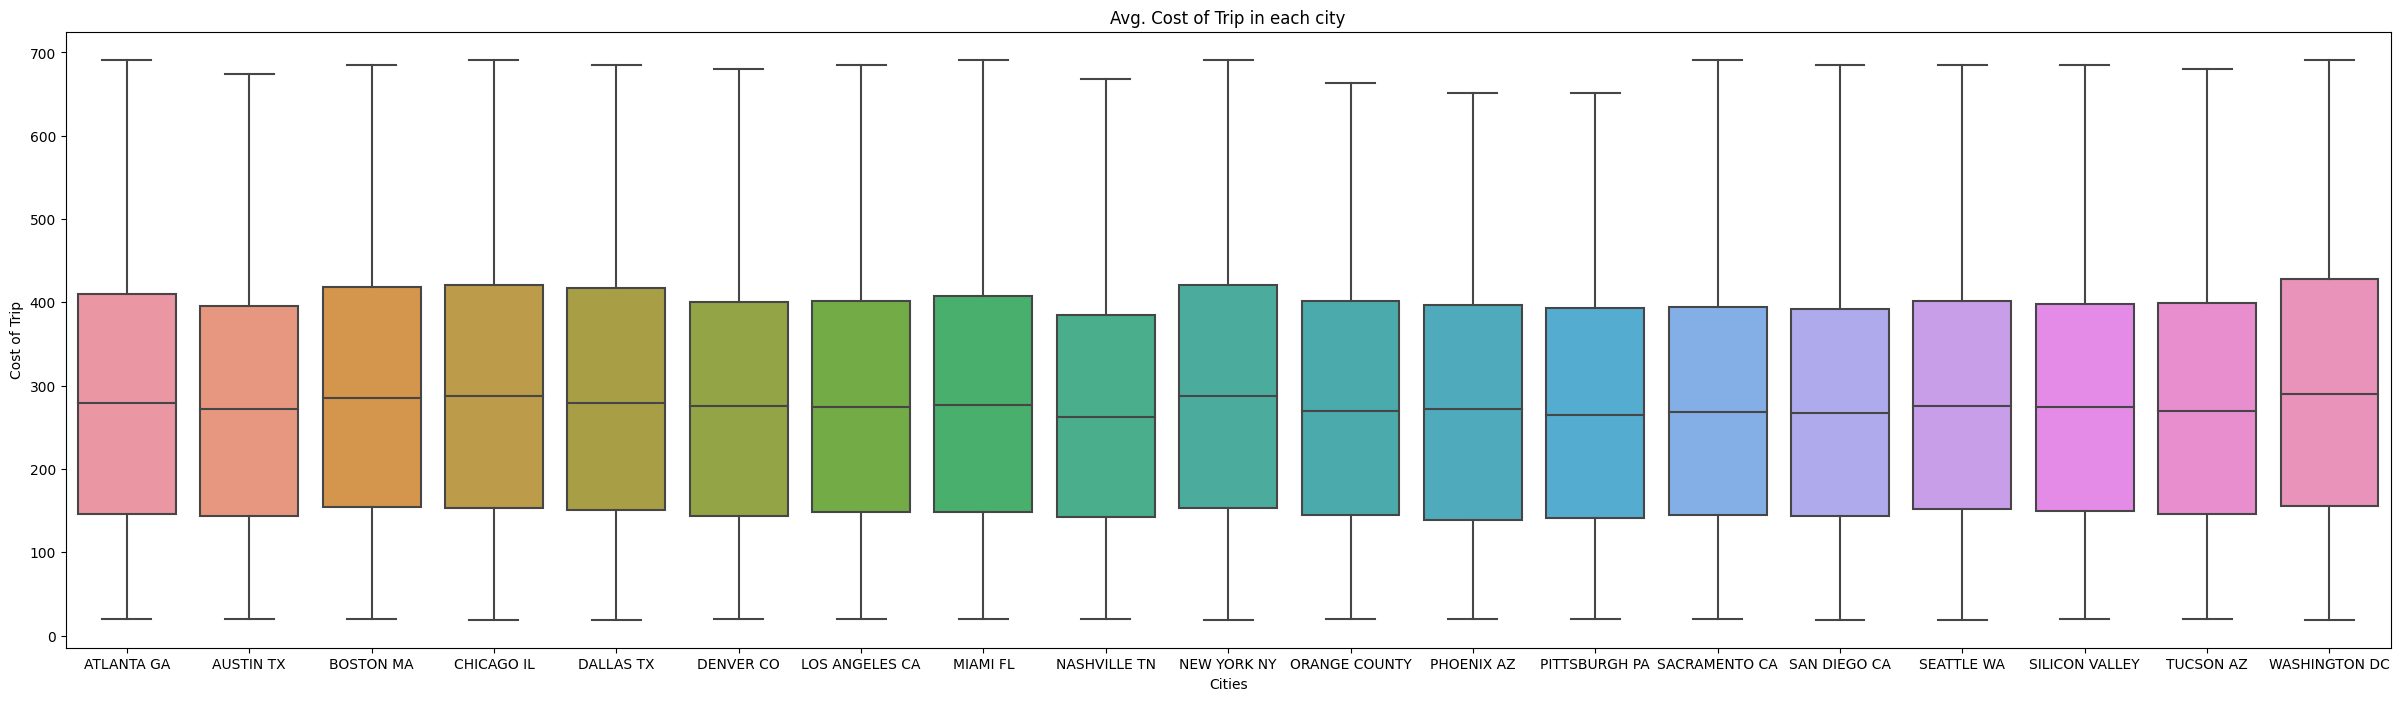

In [8]:
plt.figure(figsize=(30, 8))
sns.boxplot(data=data, y=data['Cost of Trip'], x=data['City'])
plt.title("Avg. Cost of Trip in each city")
plt.xlabel("Cities")
plt.ylabel("Cost of Trip")
plt.show()

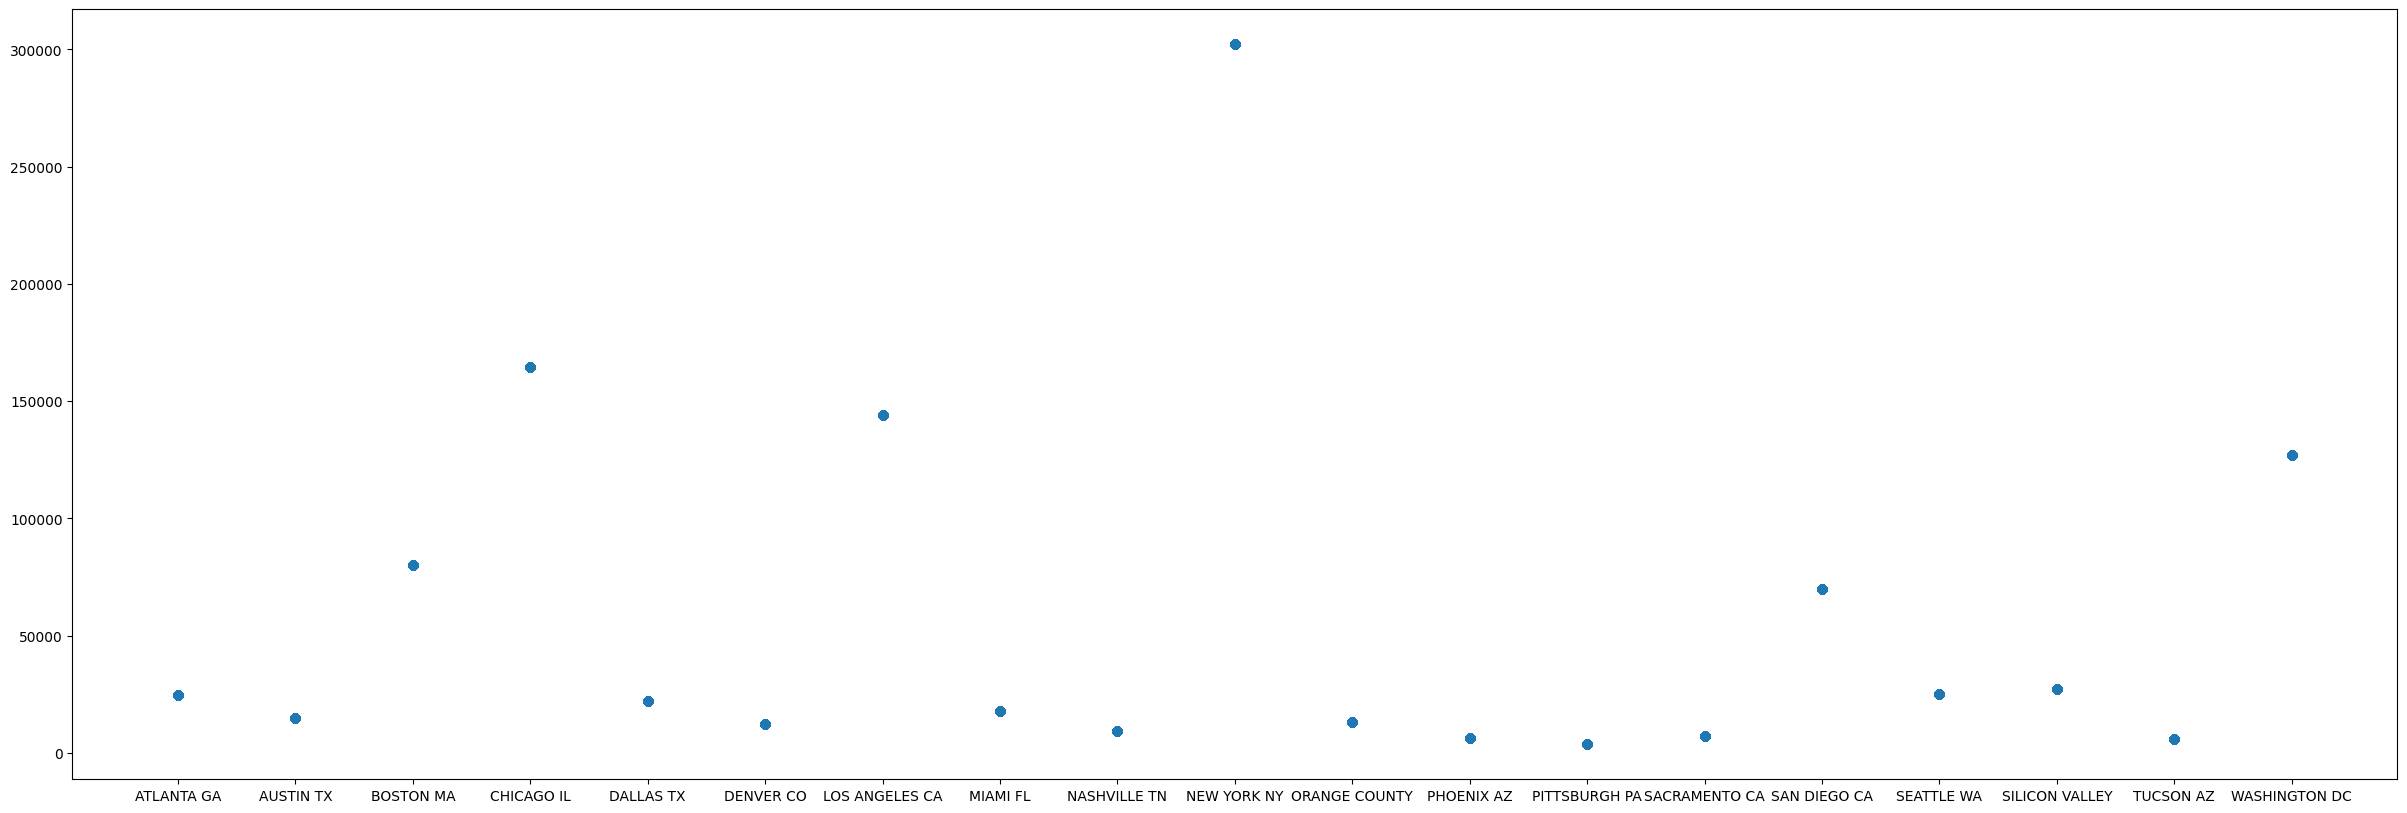

In [9]:
plt.figure(figsize=(30, 10))
plt.scatter(y=data['Users'], x=data['City'])
plt.show()

<Axes: xlabel='KM Travelled', ylabel='Cost of Trip'>

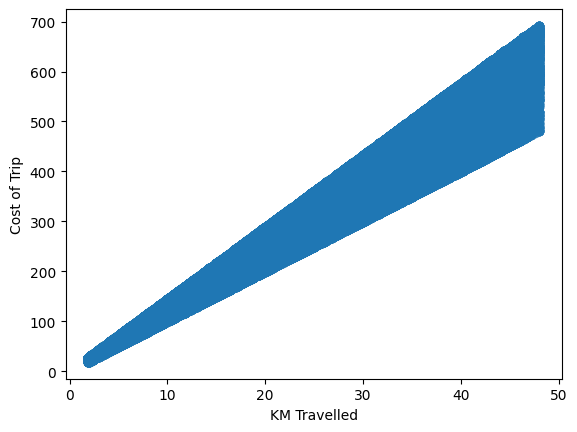

In [10]:
sns.regplot(data=data, x=data['KM Travelled'], y=data['Cost of Trip'], scatter=True, fit_reg=False)

<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

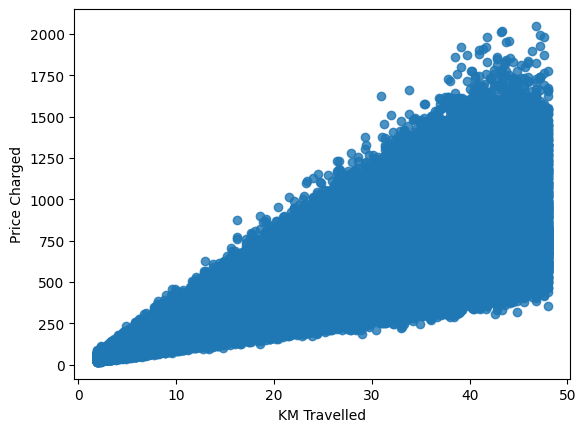

In [11]:
sns.regplot(data=data, x=data['KM Travelled'], y=data['Price Charged'], scatter=True, fit_reg=False)

In [12]:
print("Unique users:",len(pd.unique(data['Customer ID'])))

Unique users: 46148


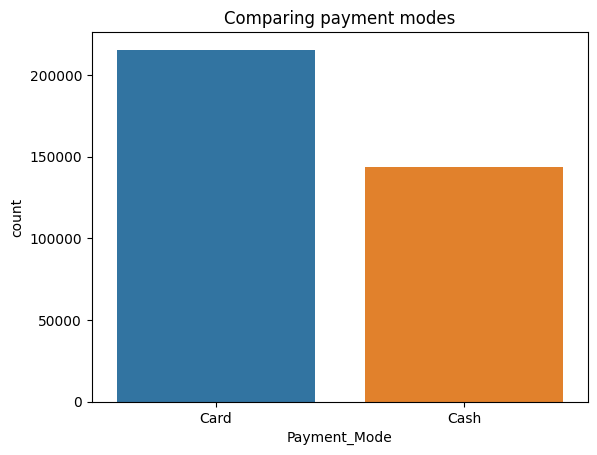

In [13]:
sns.countplot(data=data, x=data['Payment_Mode'])
plt.title("Comparing payment modes")
plt.show()

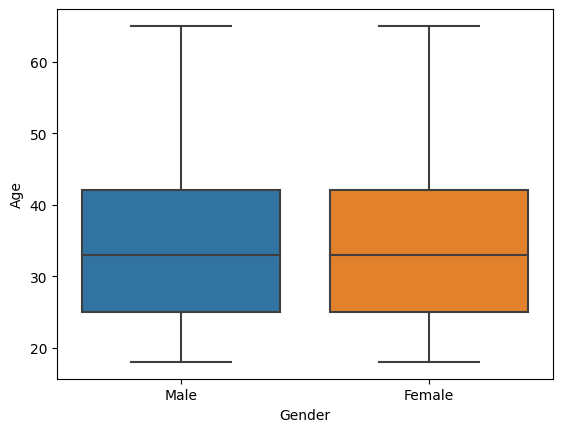

In [14]:
sns.boxplot(data=data, x=data['Gender'], y=data['Age'])
plt.show()

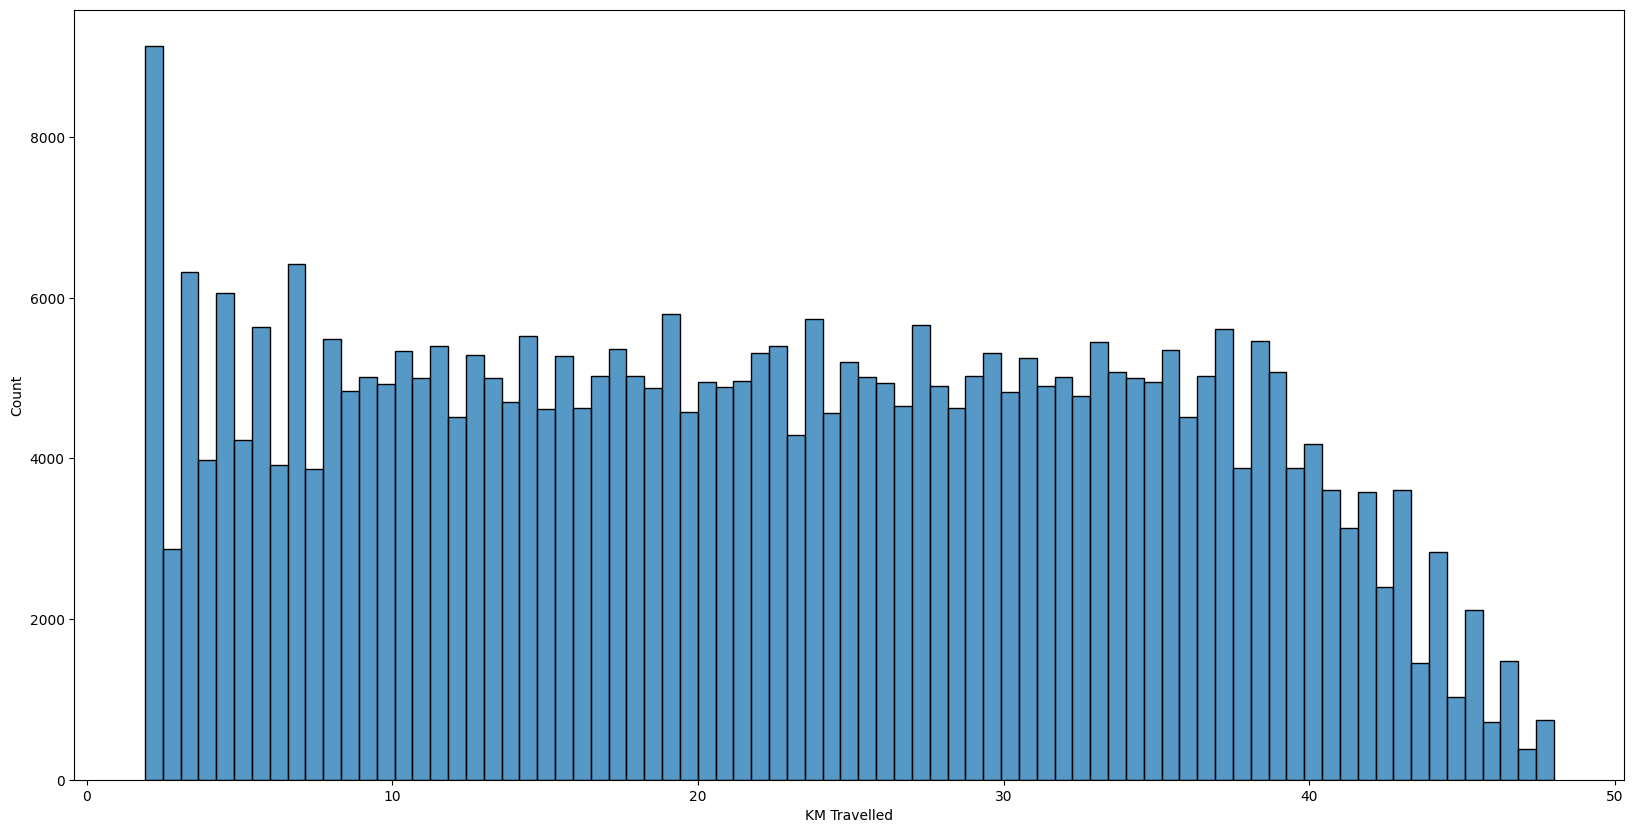

In [15]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x=data['KM Travelled'])
plt.show()

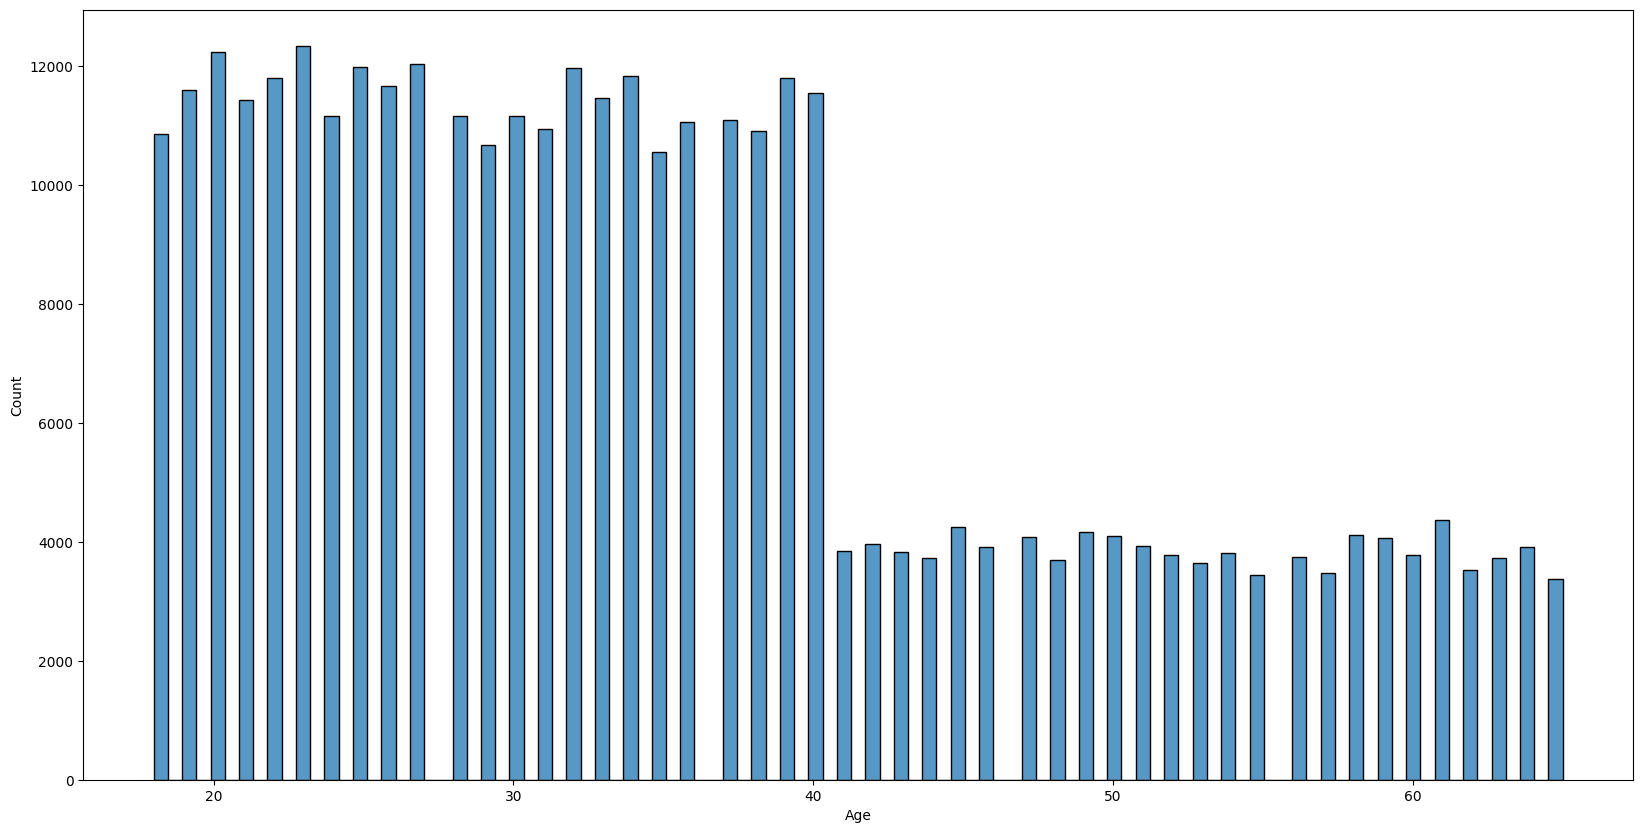

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x=data['Age'])
plt.show()

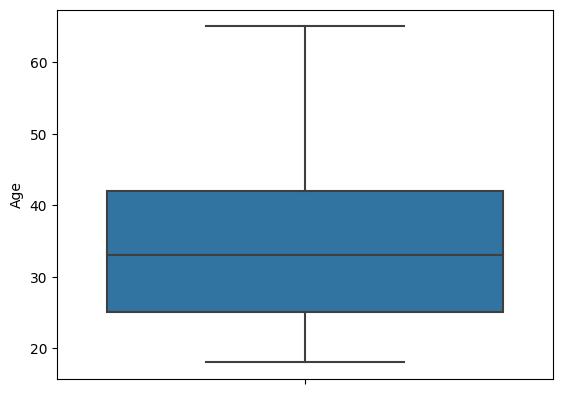

In [17]:
sns.boxplot(data=data, y=data['Age'])
plt.show()

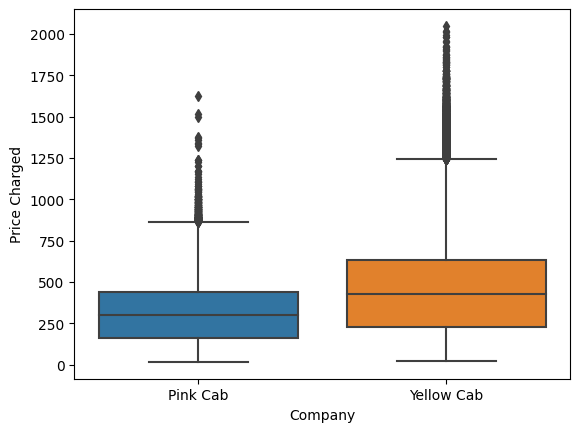

In [18]:
sns.boxplot(data=data, x=data['Company'], y=data['Price Charged'])
plt.show()

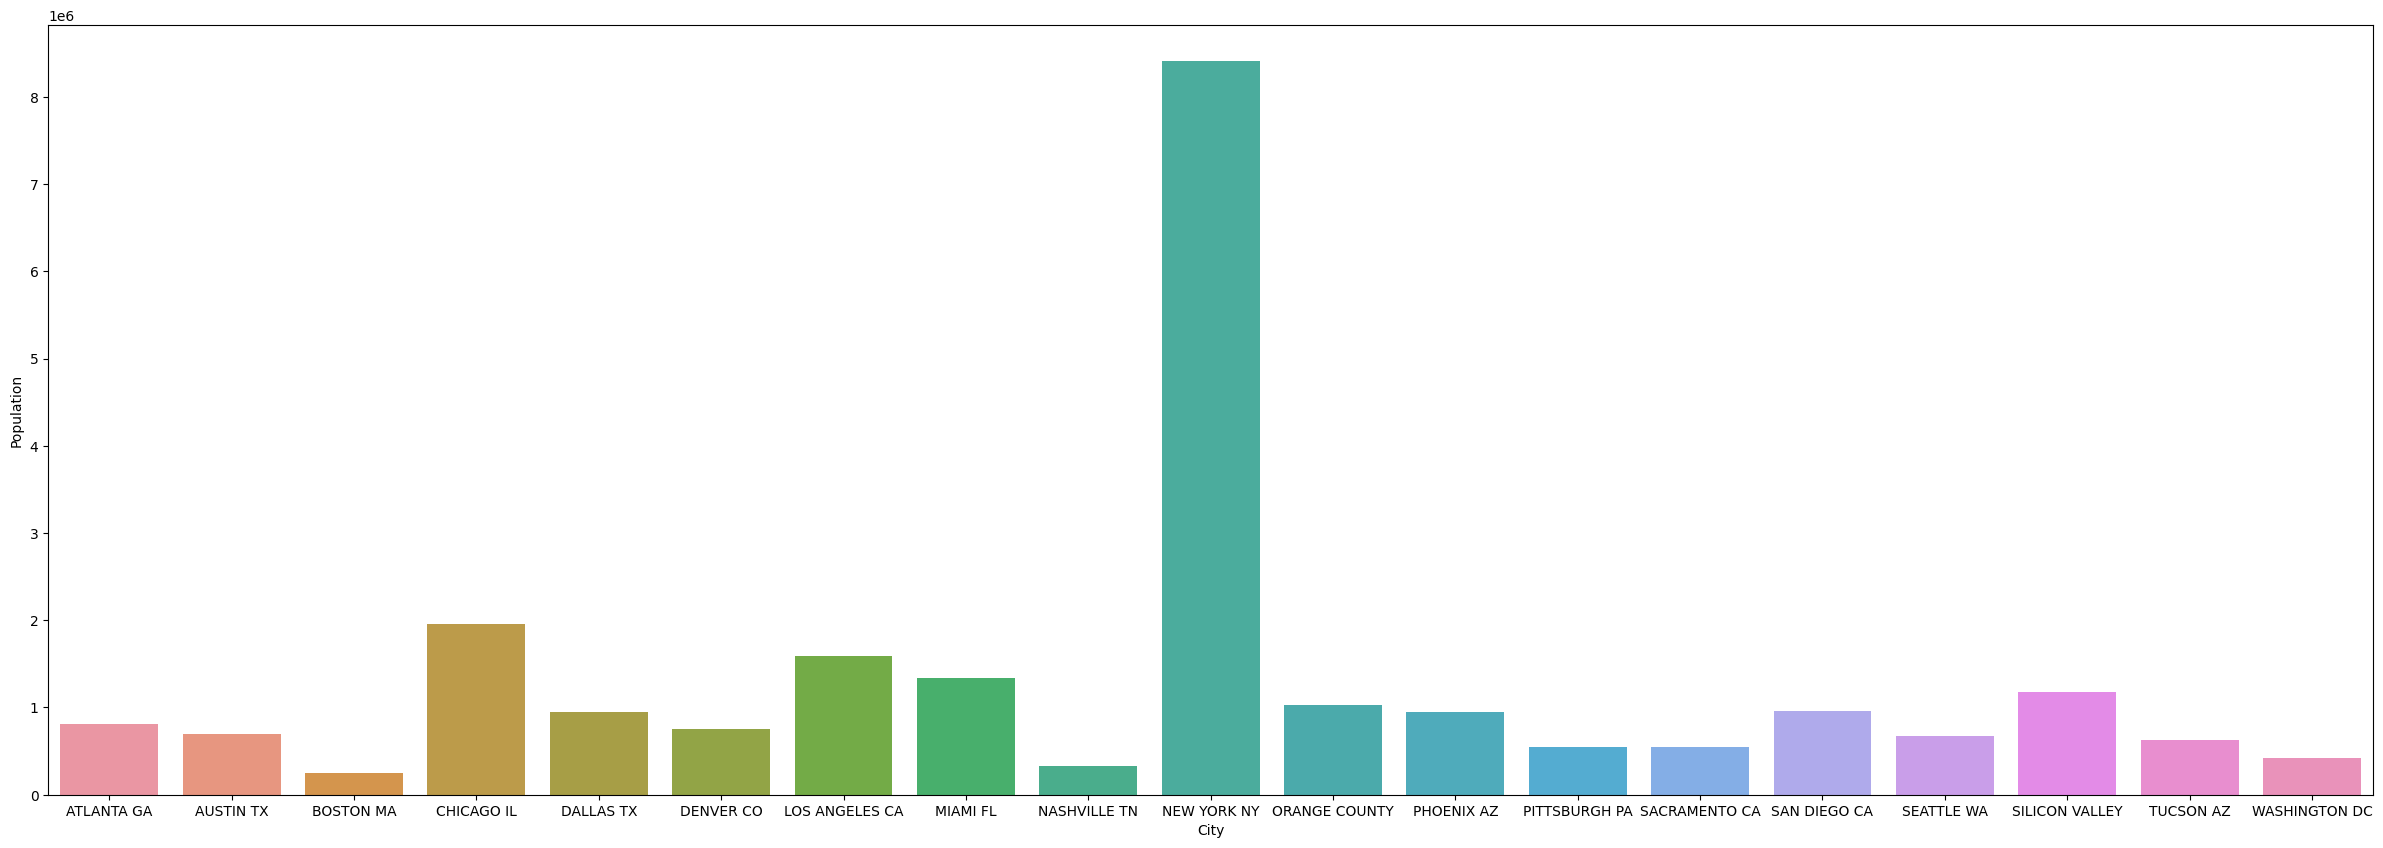

In [19]:
plt.figure(figsize=(30, 10))
sns.barplot(data=data, x=data['City'], y=data['Population'])
plt.show()

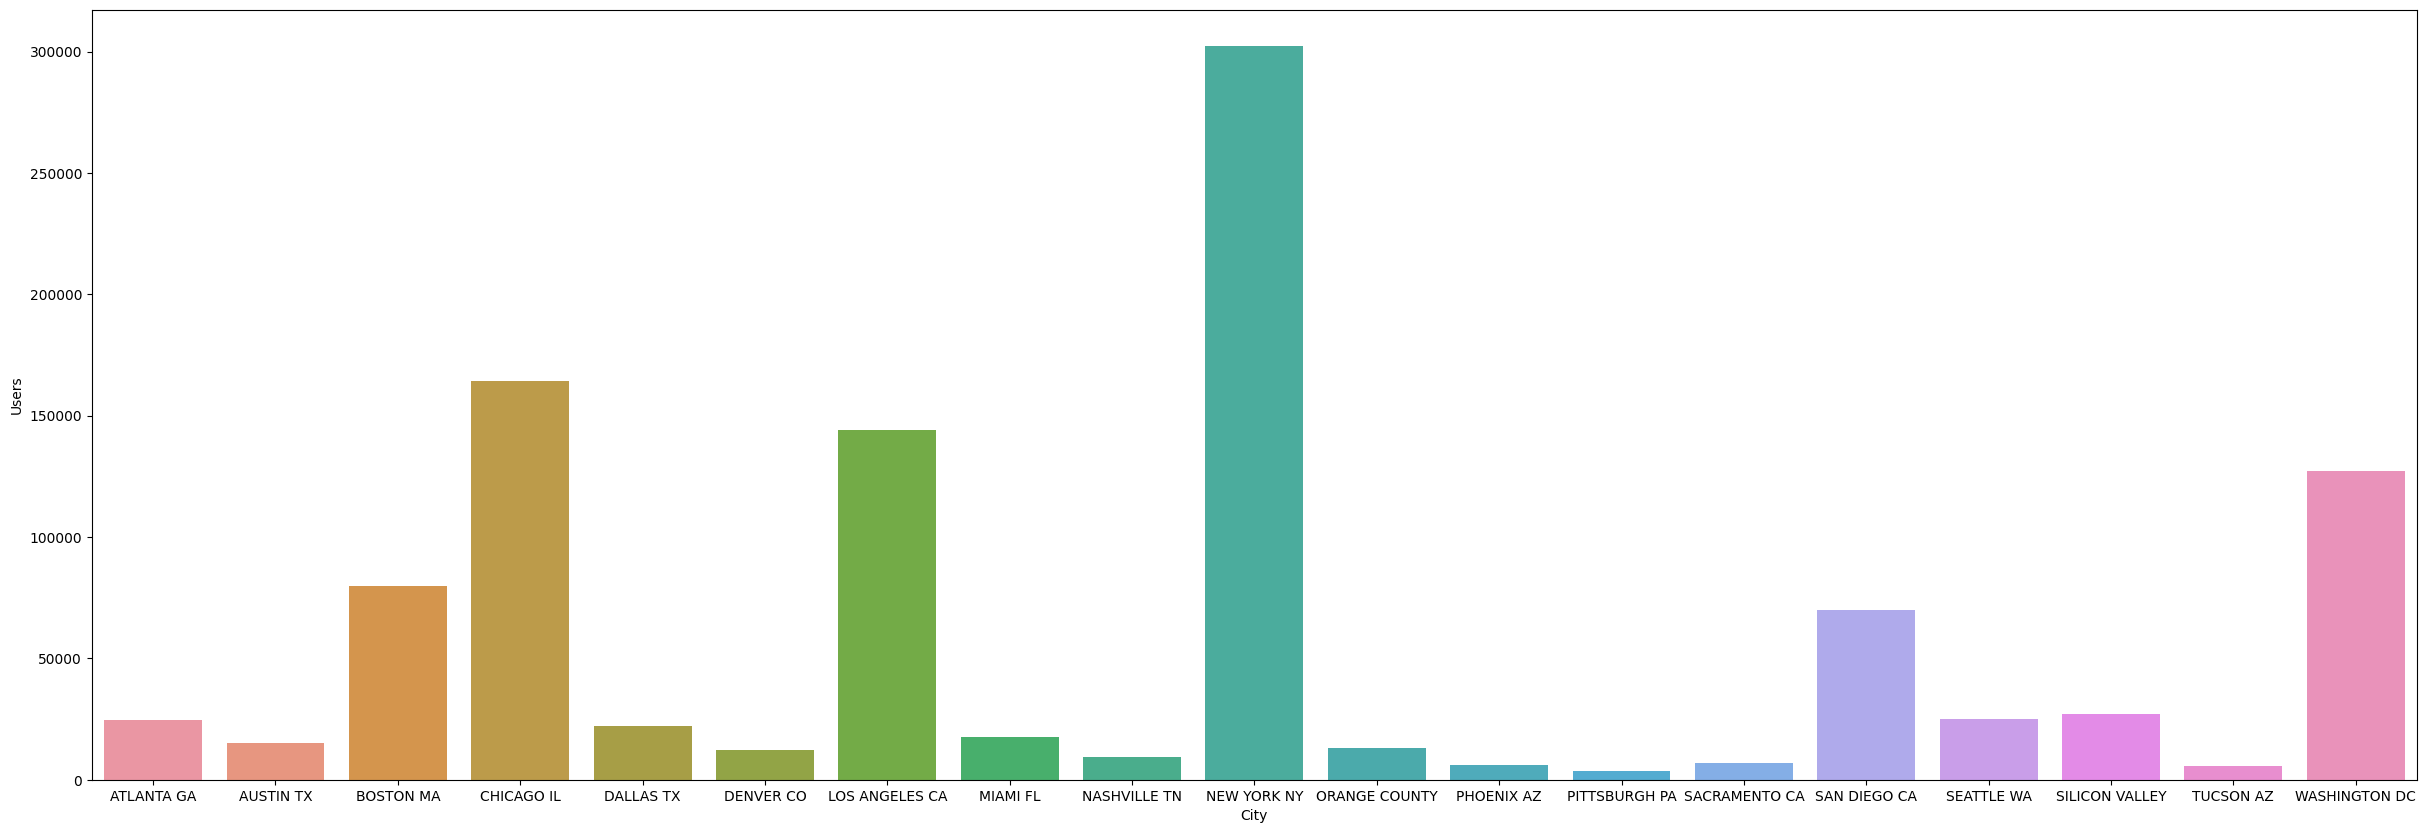

In [20]:
plt.figure(figsize=(30, 10))
sns.barplot(data=data, x=data['City'], y=data['Users'])
plt.show()

/home/jayanth/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x7000 with 0 Axes>

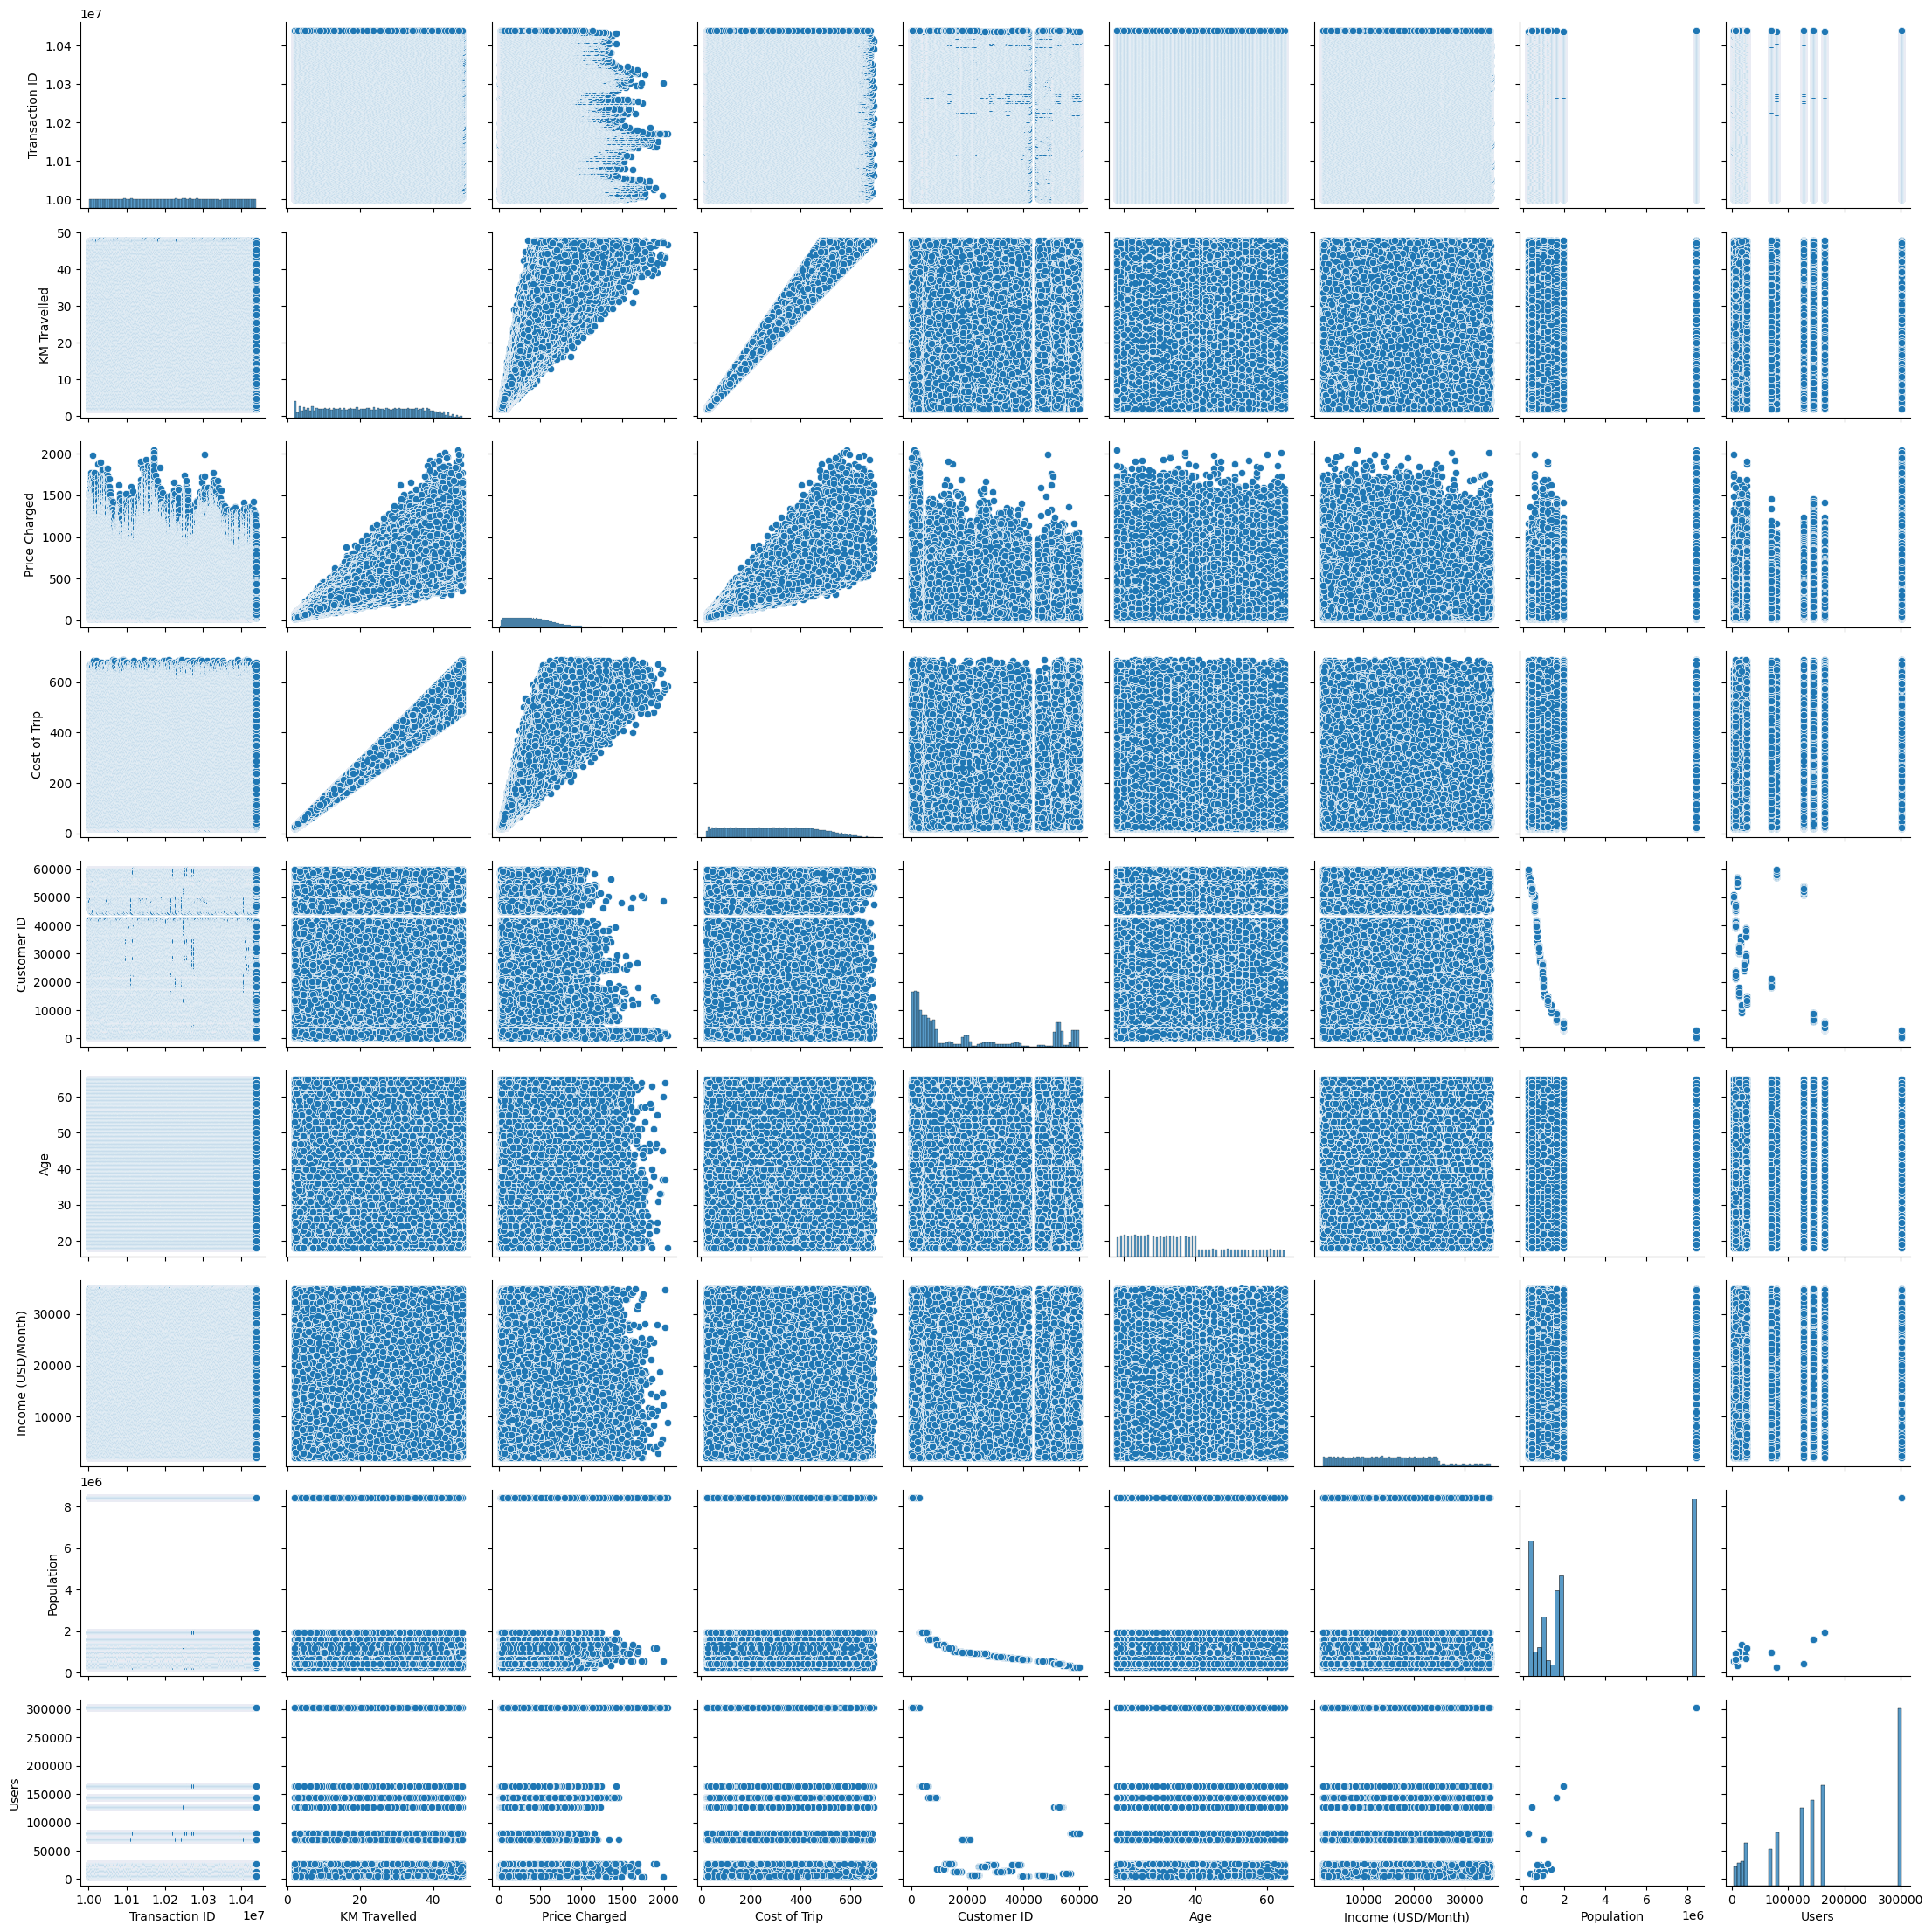

In [21]:
plt.figure(figsize=(50, 70))
sns.pairplot(data=data)
plt.show()

In [22]:
pd.crosstab(data['Age'], columns=data['City'], normalize=True)

City  ATLANTA GA  AUSTIN TX  BOSTON MA  CHICAGO IL  DALLAS TX  DENVER CO  \
Age                                                                        
18      0.000857   0.000431   0.001937    0.004285   0.000626   0.000351   
19      0.000799   0.000556   0.002437    0.006742   0.000612   0.000356   
20      0.000657   0.000431   0.002621    0.004917   0.000682   0.000295   
21      0.000620   0.000431   0.002674    0.005175   0.000593   0.000426   
22      0.000762   0.000423   0.002632    0.005376   0.000462   0.000381   
23      0.000632   0.000445   0.002880    0.005415   0.000679   0.000278   
24      0.000684   0.000384   0.002696    0.004274   0.000598   0.000348   
25      0.000648   0.000420   0.003436    0.005398   0.000540   0.000248   
26      0.000682   0.000403   0.002844    0.004786   0.000643   0.000351   
27      0.000643   0.000398   0.002474    0.004126   0.000690   0.000373   
28      0.000676   0.000456   0.002927    0.004663   0.000687   0.000378   
29      0.000640   0.000448   0.002193    0.004368   0.000559   0.000481   
30      0.000531   0.000473   0.002952    0.005579   0.000556   0.000312   
31      0.000629   0.000459   0.002860    0.004046   0.000548   0.000309   
32      0.000570   0.000442   0.002780    0.005835   0.000651   0.000259   
33      0.000607   0.000323   0.002412    0.005251   0.000618   0.000331   
34      0.000846   0.000484   0.002713    0.005164   0.000640   0.000339   
35      0.000643   0.000401   0.002944    0.004644   0.000612   0.000367   
36      0.000662   0.000434   0.002632    0.004215   0.000646   0.000353   
37      0.000504   0.000506   0.002515    0.003968   0.000676   0.000359   
38      0.000707   0.000387   0.002824    0.004691   0.000548   0.000262   
39      0.000615   0.000487   0.002713    0.005454   0.000646   0.000275   
40      0.000762   0.000403   0.002521    0.005006   0.000648   0.000345   
41      0.000231   0.000150   0.000982    0.001759   0.000198   0.000136   
42      0.000284   0.000114   0.000726    0.001992   0.000178   0.000153   
43      0.000206   0.000134   0.000838    0.001472   0.000217   0.000131   
44      0.000164   0.000114   0.000785    0.001450   0.000186   0.000064   
45      0.000250   0.000134   0.000826    0.001642   0.000262   0.000139   
46      0.000278   0.000128   0.001166    0.001536   0.000192   0.000100   
47      0.000231   0.000111   0.000565    0.001781   0.000278   0.000178   
48      0.000186   0.000147   0.000885    0.001625   0.000186   0.000134   
49      0.000217   0.000142   0.000707    0.002198   0.000287   0.000134   
50      0.000178   0.000164   0.001057    0.001350   0.000198   0.000125   
51      0.000262   0.000173   0.000876    0.001422   0.000178   0.000111   
52      0.000198   0.000173   0.000863    0.001505   0.000200   0.000106   
53      0.000303   0.000211   0.000949    0.001583   0.000173   0.000114   
54      0.000131   0.000134   0.000799    0.002229   0.000223   0.000097   
55      0.000209   0.000120   0.000754    0.001998   0.000262   0.000095   
56      0.000267   0.000139   0.000721    0.001564   0.000189   0.000092   
57      0.000156   0.000156   0.000523    0.001953   0.000164   0.000095   
58      0.000161   0.000161   0.001052    0.001795   0.000228   0.000114   
59      0.000192   0.000128   0.000888    0.002215   0.000211   0.000111   
60      0.000200   0.000156   0.000751    0.001992   0.000237   0.000114   
61      0.000267   0.000161   0.000718    0.002079   0.000228   0.000120   
62      0.000259   0.000147   0.000679    0.001717   0.000217   0.000100   
63      0.000287   0.000153   0.000991    0.001505   0.000237   0.000092   
64      0.000334   0.000131   0.000904    0.001884   0.000270   0.000106   
65      0.000200   0.000114   0.000996    0.001937   0.000167   0.000106   

City  LOS ANGELES CA  MIAMI FL  NASHVILLE TN  NEW YORK NY  ORANGE COUNTY  \
Age                                                                        
18          0.003993  0.000473      0.000337   

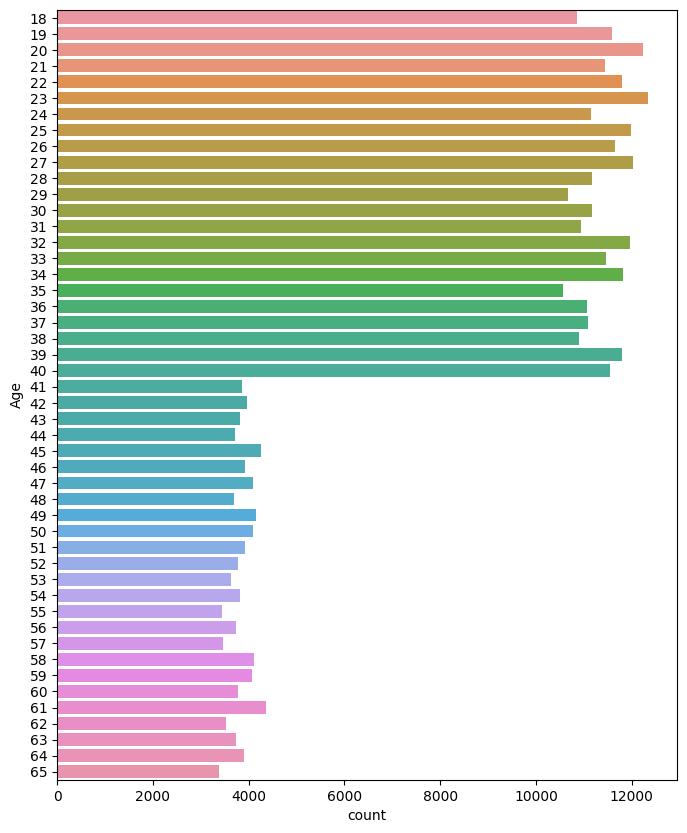

In [23]:
plt.figure(figsize=(8, 10))
sns.countplot(data=data, y=data['Age'])
plt.show()